## Natural Language Processing

![](https://www.thuatngumarketing.com/wp-content/uploads/2017/12/NLP.png.pagespeed.ce_.1YNuw_5dJH.png)

In [ ]:
# cac cong ty ban hang online amazon, tiki, lazada

# reviews -> ho muon lang nghe tu khach hang, ho nhan hang trieu review ve san pham -> 
# -> NLP  phan tich review 
# -> phan tich review -> topic modelling 
# -> phan tich review -> sentiment analysis -> phan tich cam xuc (tieu cuc hay tich cuc) -> review

In [ ]:
# dich google
# -> google cai thien duoc viec dich Eng <-> Viet -> su dung NLP -> corpus (kho du lieu)

## Cleansing content

In [86]:
text = "Tôi muốn học Python tại MCI!!!!!!"

In [87]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;!]')

#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

#set function to remove 
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub('', text) # replace symbols which are in REPLACE_BY_SPACE_RE by space
    text = text.replace("tôi ",'')
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE  
    #text = text.replace('x', '')
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [88]:
clean_text(text)

'muốn học python tại mci'

In [89]:
text = 'Phân bố theo chùm ca bệnh: Sàng lọc ho sốt cộng đồng (2); Ho sốt thứ phát (10); Liên quan nhà thuốc 95 Láng Hạ, Đống Đa (2); Liên quan Tân mai, Hoàng Mai 2 Liên quan Bệnh viện Phổi Hà Nội (2) Thông tin cụ thể 18 ca dương tính mới như sau: Chùm sàng lọc ho, sốt cộng đồng: 2 trường hợp Hai bệnh nhân cùng có địa chỉ tại Hải Bối, Đông Anh là mẹ con. 2 bệnh nhân có triệu chứng sốt, ho, đau họng ngày 30/7, làm test nhanh kháng nguyên dương tính. 2 bệnh nhân được lấy mẫu xét nghiệm RT-PCR, có kết quả dương tính ngày 31/7 (Bệnh viện Đức Giang thực hiện).Chùm ho, sốt thứ phát: 10 trường hợp 10 trường hợp có địa chỉ tại: Đông Anh (4 ca), Hoàng Mai (2 ca), Thanh Trì (3 ca), Hai Bà Trưng (một ca).Các bệnh nhân là F1 của các ca bệnh đã ghi nhận trước đó. Ngày 31/7, các bệnh nhân có triệu chứng và được lấy mẫu gửi CDC Hà Nội, kết quả xét nghiệm khẳng định dương tính.'

In [90]:
clean_text(text)

'phân bố theo chùm ca bệnh: sàng lọc ho sốt cộng đồng 2 ho sốt thứ phát 10 liên quan nhà thuốc 95 láng hạ đống đa 2 liên quan tân mai hoàng mai 2 liên quan bệnh viện phổi hà nội 2 thông tin cụ thể 18 ca dương tính mới như sau: chùm sàng lọc ho sốt cộng đồng: 2 trường hợp hai bệnh nhân cùng có địa chỉ tại hải bối đông anh là mẹ con. 2 bệnh nhân có triệu chứng sốt ho đau họng ngày 307 làm test nhanh kháng nguyên dương tính. 2 bệnh nhân được lấy mẫu xét nghiệm rt-pcr có kết quả dương tính ngày 317 bệnh viện đức giang thực hiện.chùm ho sốt thứ phát: 10 trường hợp 10 trường hợp có địa chỉ tại: đông anh 4 ca hoàng mai 2 ca thanh trì 3 ca hai bà trưng một ca.các bệnh nhân là f1 của các ca bệnh đã ghi nhận trước đó. ngày 317 các bệnh nhân có triệu chứng và được lấy mẫu gửi cdc hà nội kết quả xét nghiệm khẳng định dương tính.'

https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt

# Case study

In [26]:
import pandas as pd
review = pd.read_csv('review_food.csv')
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [27]:
#TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')  # stop_words='vietnamese'
doc_term_matrix = tfidf_vect.fit_transform(review['Text'].values.astype('U'))


![](https://miro.medium.com/max/1200/1*qQgnyPLDIkUmeZKN2_ZWbQ.png)

In [28]:
#NMF non negative matrix factoring
from sklearn.decomposition import NMF

nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix )

NMF(n_components=5, random_state=42)

![](https://www.researchgate.net/profile/Gabriella-Casalino/publication/318229646/figure/fig2/AS:548371283877888@1507753310782/Data-analysis-with-NMF.png)

In [33]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['chip', 'flavors', 'great', 'vinegar', 'bag', 'kettle', 'flavor', 'potato', 'salt', 'chips']


Top 10 words for topic #1:
['small', 'powder', 'oil', 'ingredients', 'amazon', 'energy', 'fat', 'organic', 'like', 'br']


Top 10 words for topic #2:
['use', 'price', 'coffee', 'just', 'taste', 'love', 'like', 'great', 'good', 'product']


Top 10 words for topic #3:
['iced', 'years', 'like', 'green', 'drinking', 'coffee', 'black', 'teas', 'drink', 'tea']


Top 10 words for topic #4:
['harmony', 'treats', 'old', 'eat', 'cats', 'cat', 'loves', 'dogs', 'dog', 'food']




In [30]:
topic_values = nmf.transform(doc_term_matrix)
review['Topic'] = topic_values.argmax(axis=1)
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2


In [8]:
###COHERENCE SCORE###### -> diem de hieu 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models.nmf import Nmf
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
# Use Gensim's NMF to get the best num of topics via coherence score

# Use Gensim's NMF to get the best num of topics via coherence score
texts = review['Text']
texts = texts.str.split()

In [97]:
# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)



# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(1, 5+1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, reverse=True)[0][0]

print(best_num_topics)

5


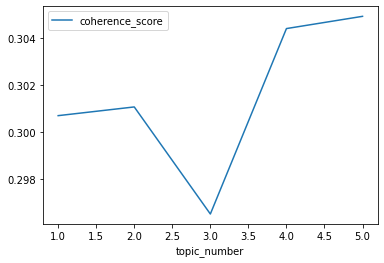

In [98]:
import pandas as pd

df = pd.DataFrame(scores,columns=['topic_number','coherence_score'])

df.plot.line(x='topic_number',y='coherence_score')

best_num_topics = sorted(scores,  reverse=True)[0][0] #key=itemgetter(1),

# Vader calculator NLP

https://medium.com/ro-codes/nlp-how-does-nltk-vader-calculate-sentiment-6c32d0f5046b

![](https://miro.medium.com/max/875/0*9oQJwaaWgjYbaw1S.png)

![](https://miro.medium.com/max/225/1*lNPhwiUsEJktBXJ8111Fdg.png)

Compound Score (-1.1), -0.05 < comp_scroe <0.05 -> neural (trung tinh), comp_scroe <-0.05 -> negative, comp_scroe >0.05 -> positive

In [32]:
review['content'] = topic_values.argmax(axis=1)

In [33]:
for i,topic in enumerate(nmf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['chip', 'flavors', 'great', 'vinegar', 'bag', 'kettle', 'flavor', 'potato', 'salt', 'chips']


Top 10 words for topic #1:
['small', 'powder', 'oil', 'ingredients', 'amazon', 'energy', 'fat', 'organic', 'like', 'br']


Top 10 words for topic #2:
['use', 'price', 'coffee', 'just', 'taste', 'love', 'like', 'great', 'good', 'product']


Top 10 words for topic #3:
['iced', 'years', 'like', 'green', 'drinking', 'coffee', 'black', 'teas', 'drink', 'tea']


Top 10 words for topic #4:
['harmony', 'treats', 'old', 'eat', 'cats', 'cat', 'loves', 'dogs', 'dog', 'food']




In [34]:
import numpy as np
conditions = [(review['content']==0),(review['content']==1),(review['content']==2),(review['content']==3),(review['content']==4)]
values = ['chip','ingredients','coffee','tea','animal_food']
review['review_detail'] = np.select(conditions,values)

In [35]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic,purpose,content,review_detail
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,4,4,animal_food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2,2,2,coffee
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,2,2,coffee
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2,2,2,coffee
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2,2,2,coffee


In [36]:
#use Vader to score sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer
st=SentimentIntensityAnalyzer()

In [37]:
compound_score = []
for i in review['Text']:
    analysis = st.polarity_scores(i)
    compound_score.append(analysis['compound']) 

In [39]:
review['sentiment_score'] = compound_score
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic,purpose,content,review_detail,sentiment_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,4,4,animal_food,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2,2,2,coffee,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,2,2,coffee,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2,2,2,coffee,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2,2,2,coffee,0.9468


In [40]:
import numpy as np
conditions = [(review['sentiment_score']>=0.05),(review['sentiment_score']<=-0.05),
              ((review['sentiment_score']>-0.05) & (review['sentiment_score']<0.05))]
values = ['positive','negative','neutral']
review['sentiment'] = np.select(conditions, values)

In [41]:
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Topic,purpose,content,review_detail,sentiment_score,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,4,4,animal_food,0.9441,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2,2,2,coffee,-0.5664,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,2,2,coffee,0.8265,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2,2,2,coffee,0.0000,neutral
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2,2,2,coffee,0.9468,positive


<AxesSubplot:>

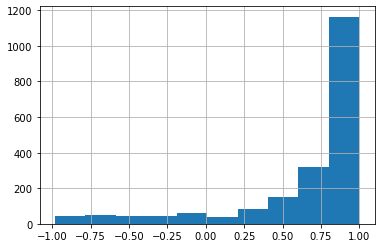

In [42]:
review['sentiment_score'].hist()

<AxesSubplot:>

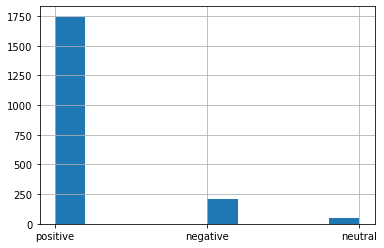

In [43]:
review['sentiment'].hist()

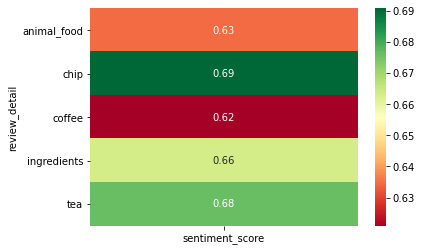

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
nscore_review = pd.pivot_table(review, values = 'sentiment_score', index = 'review_detail',aggfunc = np.average) #cham diem trung binh cam xuc

#plotting heat map
sns.heatmap(nscore_review,annot = True, cmap = 'RdYlGn') #
plt.show()